## Project Name = DeepFER: Facial Emotion Recognition Using Deep Learning 

Project Type - Classification (Deep Learning for Computer Vision)

Contribution - Individual

Member- Pramod Kolekar



**🔍 Project Summary: DeepFER – Facial Emotion Recognition Using Deep Learning**

- **Objective:**  
  Develop a robust and real-time facial emotion recognition system using deep learning techniques.

- **Core Technologies:**  
  - Convolutional Neural Networks (CNNs)  
  - Transfer Learning  
  - Data Augmentation (rotation, scaling, flipping)

- **Emotion Classes Recognized:**  
  - Angry  
  - Sad  
  - Happy  
  - Fear  
  - Neutral  
  - Disgust  
  - Surprise

- **Dataset Characteristics:**  
  - High-quality facial images with diverse backgrounds and lighting  
  - Includes both posed and spontaneous expressions  
  - Labeled with corresponding emotion annotations  
  - Sourced from public databases and crowd-sourced contributions  

- **Model Development:**  
  - Custom CNN architecture  
  - Fine-tuning of pre-trained models for improved accuracy  
  - Optimization for precision, recall, F1-score, and real-time processing  

- **Applications:**  
  - Human-computer interaction  
  - Mental health monitoring  
  - Customer service enhancement  
  - Empathetic AI-driven systems

- **Key Goals:**  
  - Achieve high emotion classification accuracy  
  - Enable real-time emotion detection from video feeds  
  - Create a deployable, user-friendly application  

- **Project Outputs:**  
  - Trained emotion recognition model  
  - Real-time emotion detection interface  
  - Comprehensive documentation and deployment in real-world scenarios  


In [1]:

from keras.utils import to_categorical
from tqdm.notebook import tqdm
from keras_preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.models import model_from_json
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'


In [17]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [18]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [19]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [20]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


extract_features(images) is designed to read a list of image file paths, convert each image into a consistent grayscale array format, and reshape them into a form that’s ready for training or inference in a CNN model—specifically one expecting images of size 48×48 pixels with a single color channel.



In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [22]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

In [23]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [28]:
x_train = train_features/255.0
x_test = test_features/255.0

In [29]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [30]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [31]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

## DL Model Implementation

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

model = Sequential()
# Add an explicit Input layer
model.add(Input(shape=(48,48,1)))

# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4, name='dropout_1'))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4, name='dropout_2'))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4, name='dropout_3'))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4, name='dropout_4'))

model.add(Flatten())

# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4, name='dropout_5'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3, name='dropout_6'))

# output layer
model.add(Dense(7, activation='softmax'))


In [33]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 195s 835ms/step - accuracy: 0.2376 - loss: 1.8387 - val_accuracy: 0.2583 - val_loss: 1.8103
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 188s 832ms/step - accuracy: 0.2462 - loss: 1.8061 - val_accuracy: 0.2884 - val_loss: 1.7290
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 187s 828ms/step - accuracy: 0.2800 - loss: 1.7361 - val_accuracy: 0.3556 - val_loss: 1.6178
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 189s 835ms/step - accuracy: 0.3540 - loss: 1.6266 - val_accuracy: 0.4341 - val_loss: 1.4506
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 196s 866ms/step - accuracy: 0.4124 - loss: 1.5157 - val_accuracy: 0.4867 - val_loss: 1.3445
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 187s 827ms/step - accuracy: 0.4504 - loss: 1.4277 - val_accuracy: 0.4870 - val_loss: 1.3234
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 187s 827ms/step - accuracy: 0.4669 - loss: 1.3910 - val_accuracy: 0.5081 - val_loss: 1.2756
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 187s 827ms/step - accuracy: 

In [35]:
# Save the model in Keras format (.keras extension)
model.save("emotiondetector.keras")  # Recommended Keras format

# Optionally, you can still save the model's architecture to a JSON file, if needed
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)


In [36]:
import os
from keras.models import load_model

# Define the path to the .keras file
file_path = "emotiondetec.keras"

# Check if the file exists before attempting to load it
if os.path.exists(file_path):
    # Load the model directly from the .keras file
    model = load_model(file_path)
    
    # Recompile the model with the desired optimizer
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
    print("Model loaded and compiled successfully.")
else:
    print(f"File not found: {file_path}. Please ensure the file path is correct.")


Model loaded and compiled successfully.


In [37]:
labels = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [38]:

def ef(image_path):
    # Load image with color_mode='grayscale'
    img = load_img(image_path, color_mode='grayscale', target_size=(48, 48))
    img_array = img_to_array(img)
    # Normalize the image
    img_array = img_array / 255.0
    # Reshape for model input
    img_array = img_array.reshape(1, 48, 48, 1)
    return img_array


Original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
Model prediction is  sad


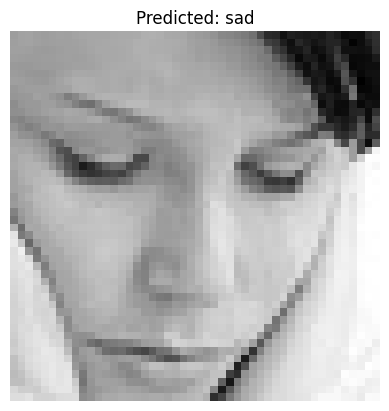

In [39]:

# Path to the image
image_path = 'images/train/sad/42.jpg'
print("Original image is of sad")

# Extract features
img = ef(image_path)

# Predict using the model
pred = model.predict(img)
pred_label = labels[pred.argmax()]  # Ensure 'labels' is defined

print("Model prediction is ", pred_label)

# Display the image
plt.imshow(img.reshape(48, 48), cmap='gray')
plt.title(f'Predicted: {pred_label}')
plt.axis('off')  # Hide axis
plt.show()


In [40]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the paths to the training and test data
train_data_dir = 'D:/work/Facial-Emotion-Recognition/images/train'
test_data_dir = 'D:/work/Facial-Emotion-Recognition/images/test'
img_size = (48, 48)  # Size expected by your model

# Create an image data generator for the test set
datagen = ImageDataGenerator(rescale=1./255)  # Normalize images

# Load the test dataset from the directory
test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=img_size,
    color_mode="grayscale",  # As your model expects grayscale images
    batch_size=32,  # You can adjust the batch size as needed
    class_mode='categorical',
    shuffle=False
)

# Predict the model's output on the test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get the predicted class indices

# Get the true labels from the test data
true_classes = test_generator.classes  # Ground truth labels

# Get class labels (emotion names) from the generator
class_labels = list(test_generator.class_indices.keys())

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

# Print the classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Print the calculated metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Found 7066 images belonging to 7 classes.


D:\work\Facial-Emotion-Recognition\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


221/221 ━━━━━━━━━━━━━━━━━━━━ 121s 544ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.57      0.52      0.54       960
     disgust       0.68      0.59      0.63       111
        fear       0.54      0.37      0.44      1018
       happy       0.80      0.86      0.82      1825
     neutral       0.53      0.62      0.57      1216
         sad       0.50      0.53      0.52      1139
    surprise       0.77      0.78      0.78       797

    accuracy                           0.63      7066
   macro avg       0.63      0.61      0.61      7066
weighted avg       0.63      0.63      0.63      7066

Accuracy: 0.6338805547693178
Precision: 0.6301398972268686
Recall: 0.6338805547693178
F1 Score: 0.6284740847856805


In [41]:
#1. Improve Data Quality and Quantity:

In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
